This is an analysis on a public dataset that I completed for a course in my BS Data Analytics program. - Elizabeth Stewart

# Project: Investigate a Dataset - No-show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#references">References</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information about ~110,000 medical appointments in Brazil. It includes patient demographics and medical history, the date on which the appointment was set, the date and location of the appointment, whether the patient received a text-message reminder, and whether the patient attended the appointment.

### Data Dictionary

| **Column Name** | **Explanation** |
|:---|:---|
| PatientId | Unique ID for each patient |
| AppointmentID | Unique ID for each appointment |
| Gender | Male or Female |
| ScheduledDay | The day on which the patient set up the appointment |
| AppointmentDay | The day the appointment was to take place |
| Age | The patient's age |
| Neighbourhood | Location of the medical facility where the appointment was scheduled |
| Scholarship | Whether or not the patient is enrolled in the Brasilian welfare program Bolsa Família |
| Hipertension | Whether or not the patient has been diagnosed with hypertension |
| Diabetes | Whether or not the patient has been diagnosed with diabetes |
| Alcoholism | Whether or not the patient has been diagnosed with alcoholism |
| Handcap | Refers to the number of disabilities a person has [according to the dataset creator](https://www.kaggle.com/datasets/joniarroba/noshowappointments/discussion/29699) |
| SMS_received | Whether or not the patient received a text-message reminder of their appointment |
| No-show | Whether or not the patient "no-showed" to their appointment. "Yes" indicates that they did *not* show up. |


### Question(s) for Analysis
What factors are relevant to whether a patient attends their scheduled appointment?

Some  variables I plan to explore are:
* the patient's disability status
* whether the patient received a text message reminder

This analysis will simply look for correlations between variables. A more advanced analysis could answer questions like: Can we predict whether a patient will attend their appointment? What supportive measures or interventions might help more patients attend their appointments?

In [1]:
# Import packages
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling

### General Properties


In [2]:
# Load the dataset and print the first few lines
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Printing the first few lines of the dataset allows us to quickly see how information is stored in each column.

For example, it appears that for several columns (Scholarship, Hipertension, Diabetes, Alcoholism, and SMS_received) the value is a binary 1 or 0 for yes or no.

We can also see that ScheduledDay includes a date and time, but AppointmentDay does not specify a time, only a date. Let's check the data types to see if they are in a format that we can perform calculations on.

In [3]:
# View more information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The .info() method allows us to see a lot of helpful information at the same time. We can see the size of the dataset (110527 rows, 14 columns) the datatypes of each column, and how many non-null values are in each column. 

Luckily, there are no nulls in our dataset.

The ScheduledDay and AppointmentDay columns are objects. Likely they are strings. Let's check exactly what data type they are:

In [4]:
#check data type of the first value in ScheduledDay
type(df['ScheduledDay'][0])

str

In [5]:
#check data type of the first value in AppointmentDay
type(df['AppointmentDay'][0])

str

We will want to convert these columns to datetime to perform calcuations. We'll take care of that in the Data Cleaning section.

In [6]:
# view summary statistics of numeric data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The .describe() method shows us summary statistics of each numerical column.

We can see that the average age of patients in the dataset is 37 years old, and the standard deviation is 23 years. We can also see a min Age value of -1, which is likely an error, and a max Age of 115, which is definitely an outlier!

Also of note is the range of 0-4 in the "Handcap" column. It is not a binary 0 or 1 as the other medical diagnosis columns are. [According to the dataset creator](https://www.kaggle.com/datasets/joniarroba/noshowappointments/discussion/29699), the number in this column is the number of disabilities the patient has. A patient who is blind and who also cannot walk would have an assigned "Handcap" value of 2.

In [7]:
# Check for unique values
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

There are 62299 unique Patient IDs for 110527 appointments. Some patients may have scheduled multiple appointments, but we should check for duplicates.

In [8]:
# Check for duplicate rows
sum(df.duplicated())

0

### Data Cleaning

First, let's standardize the column names. Start by creating a dictionary of the column names to be changed, and use the .rename() method to implement them.

In [9]:
# Rename columns
change_columns = {'PatientId': 'PatientID', 'Neighbourhood': 'Neighborhood', 'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'No-show': 'No_show'}
df.rename(columns = change_columns, inplace=True)

Next, we'll use the .apply() and .to_datetime() methods to change the two appointment columns to a datetime datatype.

In [10]:
# Change datatypes of date columns to datetime
df[['ScheduledDay', 'AppointmentDay']] = df[['ScheduledDay', 'AppointmentDay']].apply(pd.to_datetime)

We'll also change the data type of PatientID from float to int, just to make it easier to view and sort.

In [11]:
# Change PatientID to int datatype
df['PatientID'] = df['PatientID'].astype(int)

For clarity in later analysis, I will change the 0 and 1 values in the SMS_received column to "No" and "Yes".

In [12]:
# Replace 0/1 values with No/Yes
df.SMS_received.replace((0, 1), ('No', 'Yes'), inplace=True)

In [13]:
# Verify changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientID       110527 non-null  int64              
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighborhood    110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hypertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handicap        110527 non-null  int64              
 12  SMS_received    110527 non-null  object             
 13  No_show       

Are there duplicate appointments?

We know there are no duplicate rows when we compare all 14 columns. We could check for duplicates using two columns, PatientID and AppointmentDay, but a patient could reasonably have two appointments on the same day.

ScheduledDay includes a timestamp as well as the date, so unless a patient can schedule two appointments simultaneously, a duplicate of PatientID and ScheduledDay is likely an error.

We will check for duplicates using PatientID, ScheduledDay, and AppointmentDay.

In [14]:
# Check for duplicates on two columns
dupl_appts = df[df.duplicated(subset=['PatientID', 'ScheduledDay', 'AppointmentDay'], keep=False)]
dupl_appts.head(6)

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
153,19252634865,5636932,F,2016-04-28 16:38:34+00:00,2016-04-29 00:00:00+00:00,30,ITARARÉ,0,0,0,0,0,No,No
154,19252634865,5636933,F,2016-04-28 16:38:34+00:00,2016-04-29 00:00:00+00:00,30,ITARARÉ,0,0,0,0,0,No,No
287,22462135793684,5532909,M,2016-03-31 12:39:06+00:00,2016-04-29 00:00:00+00:00,43,CARATOÍRA,0,0,0,0,0,No,Yes
288,22462135793684,5532908,M,2016-03-31 12:39:06+00:00,2016-04-29 00:00:00+00:00,43,CARATOÍRA,0,0,0,0,0,Yes,Yes
362,74227955271117,5575146,F,2016-04-12 17:12:17+00:00,2016-04-29 00:00:00+00:00,1,TABUAZEIRO,0,0,0,0,0,No,No
363,74227955271117,5575145,F,2016-04-12 17:12:17+00:00,2016-04-29 00:00:00+00:00,1,TABUAZEIRO,0,0,0,0,0,Yes,No


We will drop duplicate appointments, keeping only the first one.

In [15]:
# Drop duplicate appointments
df.drop_duplicates(subset=['PatientID', 'ScheduledDay', 'AppointmentDay'], keep='first', inplace=True)

In [16]:
# check to be sure PatientID is still 62299 and ScheduledDay is still 103549
# but Appointment ID should have fewer unique values now
df.nunique()

PatientID          62299
AppointmentID     109193
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighborhood          81
Scholarship            2
Hypertension           2
Diabetes               2
Alcoholism             2
Handicap               5
SMS_received           2
No_show                2
dtype: int64

We will drop any appointments with negative Age values:

In [17]:
# Drop rows with ages less than 0
df = df.drop(df[df.Age < 0].index)

Now we will create a column that calculates the difference in days between when the appointment was scheduled and when the appointment took place.

In [18]:
# "Round down" the time on ScheduledDay for ease of calculation
df['ScheduledDay'] = df['ScheduledDay'].dt.floor('D')

In [19]:
# Create a new column with the difference between dates
df['days_between'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

In [20]:
# Check for any negative values
df.days_between.describe()

count    109192.000000
mean         10.065838
std          15.200502
min          -6.000000
25%           0.000000
50%           4.000000
75%          14.000000
max         179.000000
Name: days_between, dtype: float64

Looks like we have some negative values. Let's drop those rows.

In [21]:
# Drop rows with days_between less than 0
df = df.drop(df[df.days_between < 0].index)

In [22]:
# Divide into two groups for comparison based on whether they no-showed or not
df_show = df[df['No_show'] == 'No']
df_no_show = df[df['No_show'] == 'Yes']

<a id='eda'></a>
## Exploratory Data Analysis

Now that the data is cleaned, we can perform our analysis. Let's start by calculating the overall rate of No Shows.


### What is the overall rate of No Shows?

In [23]:
# Show counts of No Shows
df['No_show'].value_counts()

No     87331
Yes    21856
Name: No_show, dtype: int64

In [24]:
# Calculate percentage of overall No Shows
overall_rate = df.value_counts(['No_show']) / df.shape[0] * 100
overall_rate

No_show
No         79.982965
Yes        20.017035
dtype: float64

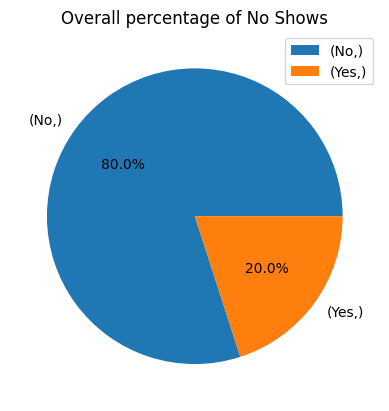

In [25]:
# Pie chart of overall No Show rates
overall_rate.plot(kind='pie', autopct='%1.1f%%', legend=True, title='Overall percentage of No Shows');

Overall, 20% of appointments are No Shows

## What factors affect whether a patient No Shows for their appointment?

### Does having a disability/handicap affect the rate of No Shows?

Now we will compare No Show rates for patients based on their disability status. We will separate patients into three groups: 
* patients with no disability (Handicap value of 0) 
* those with one disability (Handicap value of 1) 
* those with multiple disabilities (Handicap value greater than 1)

In [26]:
# Create dataframes based on Handicap values
df_no_handicap = df[df.Handicap == 0][['AppointmentID', 'No_show']]
df_single_handicap = df[df.Handicap == 1][['AppointmentID', 'No_show']]
df_multiple_handicap = df[df.Handicap > 1][['AppointmentID', 'No_show']]

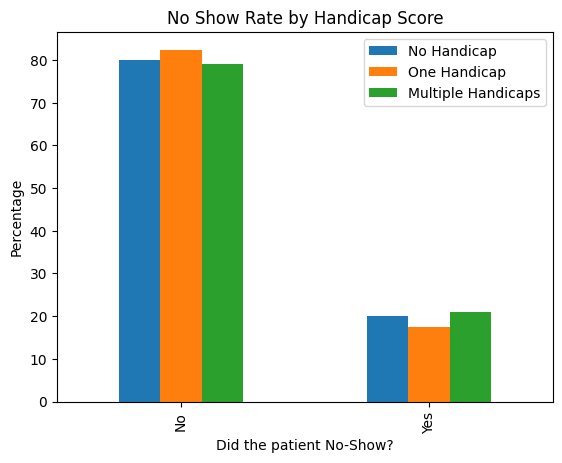

In [27]:
# Chart no show rates for each Handicap group
pd.DataFrame(
{"No Handicap": df_no_handicap['No_show'].value_counts() / df_no_handicap.shape[0] * 100,
"One Handicap": df_single_handicap['No_show'].value_counts() / df_single_handicap.shape[0] * 100,
"Multiple Handicaps": df_multiple_handicap['No_show'].value_counts() / df_multiple_handicap.shape[0] * 100
},
).plot(
kind='bar',
title='No Show Rate by Handicap Score',
ylabel="Percentage",
xlabel="Did the patient No-Show?");

Comparing the rates visually side-by-side, it appears the rate of No-Shows for each group is roughly 20%, similar to the overall rate. We will also calculate the raw counts and the percentages:

In [28]:
# Group by disability status to see counts
df.groupby(['No_show', 'Handicap'])[['No_show']].count()

No_show
No_show Handicap         
No      0           85516
        1            1661
        2             144
        3               8
        4               2
Yes     0           21461
        1             354
        2              37
        3               3
        4               1

In [29]:
# Calculate percentage of No Shows for patients with no handicap
df_no_handicap.value_counts(['No_show']) / df_no_handicap.shape[0] * 100

No_show
No         79.938678
Yes        20.061322
dtype: float64

In [30]:
# Calculate percentage of No Shows for patients with one handicap
df_single_handicap.value_counts(['No_show']) / df_single_handicap.shape[0] * 100

No_show
No         82.431762
Yes        17.568238
dtype: float64

In [31]:
# Calculate percentage of No Shows for patients with multiple handicaps
df_multiple_handicap.value_counts(['No_show']) / df_multiple_handicap.shape[0] * 100

No_show
No         78.974359
Yes        21.025641
dtype: float64

Looking at the calculated percentages, we can see that the No-Show rate for patients with one handicap is 17.6%, slightly lower than the overall rate. A more complex analysis could show whether this difference is statistically significant. It is important to note that the proportion of patients with disabilities is quite small compared to the rest of the patient population.

## Does recieving a text-message reminder affect the rate of No-Shows?

In [32]:
# View raw counts of SMS_received vs. No_show
df.groupby(['SMS_received', 'No_show'])[['SMS_received']].count()

SMS_received
SMS_received No_show              
No           No              61793
             Yes             12139
Yes          No              25538
             Yes              9717

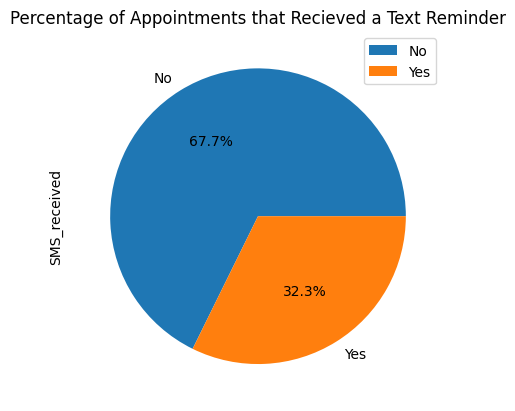

In [33]:
# Show the percentage of appointments that recieved an SMS reminder
df.SMS_received.value_counts().plot(kind='pie', autopct='%1.1f%%', legend=True, title='Percentage of Appointments that Recieved a Text Reminder');

Only 32.3% of appointments received a Text Reminder. It would be helpful to know how many patients are enrolled in SMS reminders, how far in advance of an appointment a text is sent, and whether multiple reminders are sent.

Does receiving a reminder text affect the rate of No-Shows?

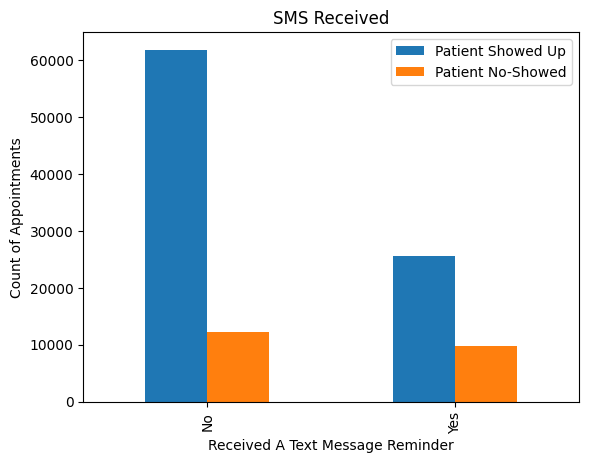

In [34]:
# Chart to compare No-Show rates by whether an SMS was received
pd.DataFrame(
{"Patient Showed Up": df_show['SMS_received'].value_counts(),
"Patient No-Showed": df_no_show['SMS_received'].value_counts()
},
).plot(
kind='bar',
title='SMS Received',
ylabel="Count of Appointments",
xlabel="Received A Text Message Reminder");

In [35]:
# Calculate percentage of No Shows for appointments that did not receive a reminder
df_SMS_no = df[df['SMS_received'] == 'No']
df_SMS_no.value_counts(['No_show']) / df_SMS_no.shape[0] * 100

No_show
No         83.580858
Yes        16.419142
dtype: float64

In [36]:
# Calculate percentage of No Shows for appointments that did receive a reminder
df_SMS_yes = df[df['SMS_received'] == 'Yes']
df_SMS_yes.value_counts(['No_show']) / df_SMS_yes.shape[0] * 100

No_show
No         72.437952
Yes        27.562048
dtype: float64

For appointments that received a text reminder, 27.6% of them were No Shows, compared to 16.4% No Shows for appointments that did not receive a reminder. This is unexpected, as one might expect reminders to encourage patients to attend their appointments. This would be interesting to examine further, such as considering how far in advance appointments are scheduled and when/how often reminder texts are sent.

<a id='conclusions'></a>
## Conclusions

For the first variable we examined, a documented disability did not appear to have an effect on whether a patient showed up for their appointment. Further analysis would confirm whether any difference is statistically significant.

Another variable we examined was whether recieving an SMS text message reminder affected whether a patient showed up for their appointment. For appointments that recieved a reminder, the rate of No-Shows was actually higher. Analysis of other related variables could explain this difference. 

More information that could be useful is more precise locations of medical facilites and patient home addresses so as to calculate proximity to the patient's home and proximity to public transit.

This analysis is also limited by the small range of dates.

<a id='references'></a>
## References
I used [tableconvert.com](https://tableconvert.com/) to format the data dictionary in the Introduction section.

In [37]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 4 image(s).
[NbConvertApp] Writing 479792 bytes to Investigate_a_Dataset.html
